In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)


In [3]:
df = pd.read_csv("../data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
from dowhy import CausalModel
import dowhy.datasets as ds

In [8]:
d = ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

In [9]:
d['outcome_name'] = "Diagnosis"

In [10]:
d["common_causes_names"] = ["area_mean", "concavity_mean", "area_se", "concavity_worst","symmetry_worst"]

In [11]:
d["dot_graph"] = 'digraph { U[label="Unobserved Confounders"];U->Diagnosis;area_mean->Diagnosis;concavity_mean->Diagnosis;area_se->Diagnosis;symmetry_worst->Diagnosis }'

In [12]:
d

{'df':             W0        W1        W2        W3        W4     v0         y
 0     0.897861 -1.100367  0.002088  0.037285  0.645230  False  1.069341
 1     1.132347 -0.039853 -2.309898  1.018808 -0.763545  False  0.061836
 2    -0.633919 -1.072252 -1.067845  0.874398 -1.010198  False -1.695076
 3     0.267738  1.609637  1.105117  0.362385  0.504597   True  9.826506
 4    -0.305589  0.366924 -1.795425 -0.417258  0.472718  False -3.664950
 ...        ...       ...       ...       ...       ...    ...       ...
 9995 -0.664646  1.671564 -0.685078 -0.336361 -0.848556  False -2.471660
 9996 -1.051120  0.201307  0.625642 -0.904426  1.001023   True  3.105026
 9997  0.107838  0.350000 -0.803634  1.036932  0.326207  False  2.501758
 9998 -0.244198  0.707113 -1.577512  0.272335 -1.829983  False -3.221157
 9999  0.633427 -0.659653 -1.568166  1.542275 -0.366642  False  2.042562
 
 [10000 rows x 7 columns],
 'treatment_name': ['v0'],
 'outcome_name': 'Diagnosis',
 'common_causes_names': ['area_m

In [13]:
ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

{'df':             W0        W1        W2        W3        W4     v0         y
 0    -1.171152 -2.542132 -1.490419  0.310783  0.577783  False -6.175736
 1     1.520437  0.255056 -1.318390  1.092169 -1.397089  False -1.549872
 2    -0.677069  0.233140  0.640748  0.446592 -0.129432   True  4.629310
 3     0.565729 -0.902212 -0.361132  1.260278 -0.404419  False -0.693057
 4    -0.293719 -0.147307 -1.149785  1.091868  0.328585  False -1.305596
 ...        ...       ...       ...       ...       ...    ...       ...
 9995 -0.253029 -1.453283 -2.581064 -0.572039 -0.358845  False -7.628308
 9996 -0.807837 -0.236451 -1.641037  1.052203  0.687378  False -2.458855
 9997  0.377091  0.282303 -0.404547  0.549487 -1.768386  False -3.887255
 9998 -0.251113 -0.498780 -0.820344 -0.300319 -0.035899   True  2.311163
 9999 -0.274016 -2.189690 -0.362593  1.145716 -0.897546  False -5.345192
 
 [10000 rows x 7 columns],
 'treatment_name': ['v0'],
 'outcome_name': 'y',
 'common_causes_names': ['W0', 'W1', 'W2

In [14]:
model = CausalModel(
    data = df,
    treatment = ["Diagnosis"],
    outcome = "Diagnosis",
    graph = d["dot_graph"]
)

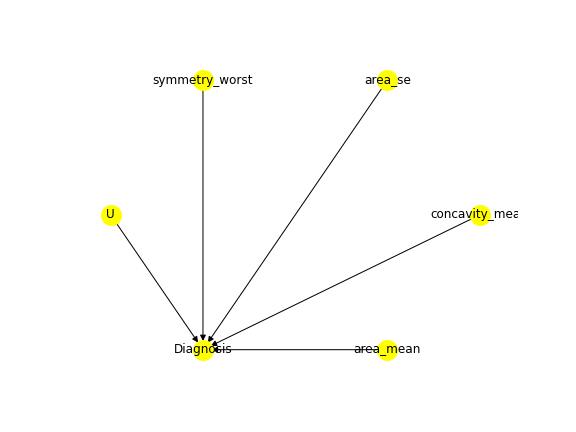

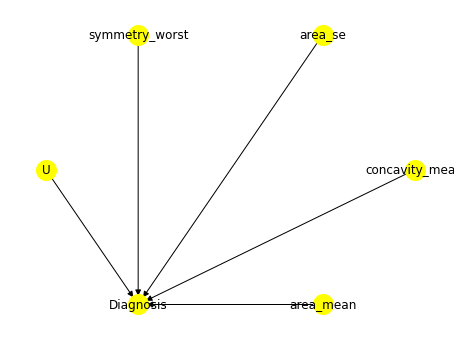

In [15]:
model.view_model(layout = "dot_graph")
from IPython.display import Image, display
display(Image(filename = "causal_model.png"))

In [17]:
import networkx as nx
G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from(range(100, 110))
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)
G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)
G = nx.DiGraph(day="Friday")
G.graph

{'day': 'Friday'}

In [18]:
G.add_node(1, time="5pm")
G.add_nodes_from([3], time="2pm")
G.nodes[1]

G.nodes[1]["room"] = 714
del G.nodes[1]["room"]  # remove attribute
list(G.nodes(data=True))

[(1, {'time': '5pm'}), (3, {'time': '2pm'})]

In [19]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color="red")
G.add_edges_from([(1, 2, {"color": "blue"}), (2, 3, {"weight": 8})])
G[1][2]["weight"] = 4.7
G.edges[1, 2]["weight"] = 4

In [20]:
G.graph

{'day': 'Friday'}

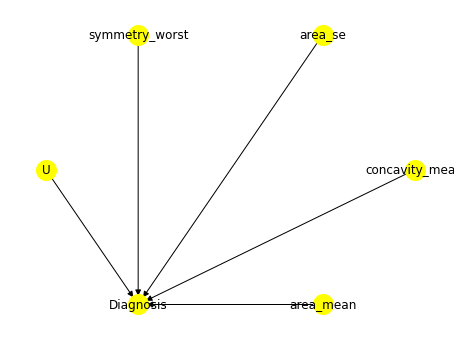

In [21]:
model.view_model(layout = "dot")